In [10]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import pandas as pd

In [19]:
img = cv2.imread('digits.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(gray.shape) # 1000 rows, 2000 columns

(1000, 2000)


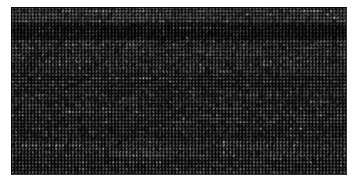

In [14]:
#pd.DataFrame(gray).to_csv('E://check.csv')
#plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
#plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
#plt.show()

In [3]:

# Now we split the image to 5000 cells, each 20x20 size
cells = [np.hsplit(row,100) for row in np.vsplit(gray,50)]

# Make it into a Numpy array. It size will be (50,100,20,20)
x = np.array(cells)

# Now we prepare train_data and test_data.
train = x[:,:50].reshape(-1,400).astype(np.float32) # Size = (2500,400)
test = x[:,50:100].reshape(-1,400).astype(np.float32) # Size = (2500,400)
# Create labels for train and test data
k = np.arange(10)
train_labels = np.repeat(k,250)[:,np.newaxis]
test_labels = train_labels.copy()


In [57]:
pd.DataFrame(train).to_csv('E://train.csv')
pd.DataFrame(train_labels).to_csv('E://train_labels.csv')

In [4]:
print(len(train_labels),len(test_labels))

2500 2500


In [36]:
arr_accuracy = []
for i in range(1,20):
    
    # Initiate kNN, train the data, then test it with test data for k=1
    knn = cv2.ml.KNearest_create() 
    knn.train(train,cv2.ml.ROW_SAMPLE,train_labels)


    ret,result,neighbours,dist = knn.findNearest(test,k=i)

    # Now we check the accuracy of classification
    # For that, compare the result with test_labels and check which are wrong
    matches = result==test_labels
    correct = np.count_nonzero(matches)
    accuracy = correct*100.0/result.size
    arr_accuracy.append(accuracy)



In [37]:
arr_accuracy

[92.0,
 91.24,
 91.64,
 91.92,
 91.76,
 91.56,
 91.44,
 91.52,
 91.0,
 91.16,
 91.0,
 90.96,
 90.84,
 90.8,
 90.72,
 90.44,
 90.16,
 90.04,
 89.96]

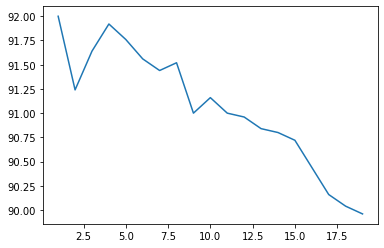

In [46]:
k_values= np.arange(1,20)
#print(k_values)
plt.plot(k_values, arr_accuracy)

In [47]:
# Initiate kNN, train the data, then test it with test data for k=1
knn = cv2.ml.KNearest_create() 
knn.train(train,cv2.ml.ROW_SAMPLE,train_labels)
ret,result,neighbours,dist = knn.findNearest(test,k=5)
# Now we check the accuracy of classification
# For that, compare the result with test_labels and check which are wrong
matches = result==test_labels
correct = np.count_nonzero(matches)
accuracy = correct*100.0/result.size

2500


In [52]:
print(len(list(test_labels)))

2500
